# New models and dataframe - now updated until week 15

In [2]:
from combined_player import player_minutes_value
from html_scraper import db
from mongo_to_db import create_master_df

In [3]:
import pprint
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_columns', 50)

# Player Dataframe

In [14]:
games = db['games_update'].find()
players = db.players.find()

In [15]:
final_df = player_minutes_value(games, players)

In [18]:
final_df.head()

,player_id,player_name,club,birthday,age,foot,position_id,squad_num,height,total_minutes_played,transfer_value(sterlings),transfer_value(USD)
0,19132.0,Alexander Domínguez,Squad Club Atlético Vélez Sarsfield,"Jun 5, 1987 (31)",31,right,1,22.0,"1,95 m",1080.000000,£1.58m,2.01
1,27987.0,Lucas Hoyos,Squad Club Atlético Vélez Sarsfield,"Apr 29, 1989 (29)",29,right,1,12.0,"1,83 m",180.000000,£135k,0.17
2,30896.0,Gastón Díaz,Squad Club Atlético Vélez Sarsfield,"Mar 13, 1988 (30)",30,right,2,24.0,"1,75 m",986.483333,£450k,0.57
3,94225.0,Joaquín Laso,Squad Club Atlético Vélez Sarsfield,"Jul 4, 1990 (28)",28,right,2,6.0,"1,85 m",1080.000000,£270k,0.34
4,99779.0,Luis Abram,Squad Club Atlético Vélez Sarsfield,"Feb 27, 1996 (22)",22,left,2,29.0,"1,80 m",1170.000000,£405k,0.51


In [21]:
final_df['position_id'] = final_df['position_id'].replace(1, 'Goalie')
final_df['position_id'] = final_df['position_id'].replace(2, 'Defender')
final_df['position_id'] = final_df['position_id'].replace(3, 'Midfielder')
final_df['position_id'] = final_df['position_id'].replace(4, 'Forward')
final_df['position_id'] = final_df['position_id'].replace(5, 'Defender')

In [22]:
#minutes have been updated
final_df.head()

,player_id,player_name,club,birthday,age,foot,position_id,squad_num,height,total_minutes_played,transfer_value(sterlings),transfer_value(USD)
0,19132.0,Alexander Domínguez,Squad Club Atlético Vélez Sarsfield,"Jun 5, 1987 (31)",31,right,Goalie,22.0,"1,95 m",1080.000000,£1.58m,2.01
1,27987.0,Lucas Hoyos,Squad Club Atlético Vélez Sarsfield,"Apr 29, 1989 (29)",29,right,Goalie,12.0,"1,83 m",180.000000,£135k,0.17
2,30896.0,Gastón Díaz,Squad Club Atlético Vélez Sarsfield,"Mar 13, 1988 (30)",30,right,Defender,24.0,"1,75 m",986.483333,£450k,0.57
3,94225.0,Joaquín Laso,Squad Club Atlético Vélez Sarsfield,"Jul 4, 1990 (28)",28,right,Defender,6.0,"1,85 m",1080.000000,£270k,0.34
4,99779.0,Luis Abram,Squad Club Atlético Vélez Sarsfield,"Feb 27, 1996 (22)",22,left,Defender,29.0,"1,80 m",1170.000000,£405k,0.51


# Shots Dataframe

In [46]:
games = db['games_update'].find()
shots_df = create_master_df(games)

/Users/david/galvanize/super_liga_xg/mongo_to_db.py:69: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  final_df = pd.concat([attach_to_df, df], axis=0, ignore_index=True)
/Users/david/galvanize/super_liga_xg/dataframe_cleaner.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  input_df['is_goal'] = input_df.loc[:, 'shot_type'].isin([9, 11, 12, 13]).astype(int)


In [47]:
#2955 shots to 3437 shots 
shots_df.head()

,game_id,player_id,shot_coord_x1,shot_coord_x2,shot_coord_y1,shot_coord_y2,shot_coord_z1,shot_coord_z2,shot_id,shot_type,team_id,time_of_event(min),passed_from_id,pass_coord_x1,pass_coord_x2,pass_coord_y1,pass_coord_y2,pass_coord_z1,pass_coord_z2,corner_kick,shot_distance,shot_angle,assisted_shot,is_penalty_attempt,is_goal
0,448548,99779.0,6.67,0.00,1.51,-1.21,-1,0.83,22336297,11,20,1.033333,177285.0,0.89,12.44,29.36,-4.84,-1.0,-1.0,1.0,6.838786,12.755990,1.0,0.0,1.0
1,448548,60730.0,21.33,12.00,4.24,-0.91,-1,0.73,22336386,35,20,9.683333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,21.747333,11.242763,0.0,0.0,0.0
2,448548,177285.0,12.00,1.78,0.00,-3.03,-1,0.21,22336583,13,20,26.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,12.000000,0.000000,0.0,1.0,1.0
3,448548,185745.0,8.44,0.89,14.53,-6.66,-1,-1.00,22336723,33,20,38.883333,177285.0,22.67,6.22,3.93,19.67,-1.0,-1.0,0.0,16.803407,59.849102,1.0,0.0,0.0
4,448548,77892.0,22.22,0.44,13.92,-8.48,-1,-1.00,22336739,33,13,40.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,26.220122,32.065607,0.0,0.0,0.0


# Testing Models

In [29]:
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [30]:
from model_prep import create_rf_prep

In [48]:
#use later when retesting on whole dataset
model_ready = create_rf_prep(shots_df)

In [49]:
# model_ready.head()

In [50]:
shots_df.head()

,game_id,player_id,shot_coord_x1,shot_coord_x2,shot_coord_y1,shot_coord_y2,shot_coord_z1,shot_coord_z2,shot_id,shot_type,team_id,time_of_event(min),passed_from_id,pass_coord_x1,pass_coord_x2,pass_coord_y1,pass_coord_y2,pass_coord_z1,pass_coord_z2,corner_kick,shot_distance,shot_angle,assisted_shot,is_penalty_attempt,is_goal
0,448548,99779.0,6.67,0.00,1.51,-1.21,-1,0.83,22336297,11,20,1.033333,177285.0,0.89,12.44,29.36,-4.84,-1.0,-1.0,1.0,6.838786,12.755990,1.0,0.0,1.0
1,448548,60730.0,21.33,12.00,4.24,-0.91,-1,0.73,22336386,35,20,9.683333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,21.747333,11.242763,0.0,0.0,0.0
2,448548,177285.0,12.00,1.78,0.00,-3.03,-1,0.21,22336583,13,20,26.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,12.000000,0.000000,0.0,1.0,1.0
3,448548,185745.0,8.44,0.89,14.53,-6.66,-1,-1.00,22336723,33,20,38.883333,177285.0,22.67,6.22,3.93,19.67,-1.0,-1.0,0.0,16.803407,59.849102,1.0,0.0,0.0
4,448548,77892.0,22.22,0.44,13.92,-8.48,-1,-1.00,22336739,33,13,40.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,26.220122,32.065607,0.0,0.0,0.0


In [97]:
#holding 20% of data for last test
columns = ['shot_distance', 'shot_angle', 'assisted_shot', 'is_penalty_attempt']
holdout = shots_df.sample(frac=.2, random_state=8)
holdout_x = holdout[columns]
holdout_y = holdout['is_goal']

In [98]:
train = shots_df.drop(holdout.index).copy()
data = train[columns]
y = train['is_goal']
indices = train.index.values 

In [99]:
X_train, X_test,indices_train,indices_test = train_test_split(data,indices, test_size=0.33, random_state=8)

y_train, y_test = y[indices_train],  y[indices_test]

In [100]:
X_train.head()

,shot_distance,shot_angle,assisted_shot,is_penalty_attempt
2144,12.419549,21.441602,0.0,0.0
2657,17.180736,47.712851,0.0,0.0
1000,5.733315,-71.912677,0.0,0.0
1880,17.940864,19.707530,0.0,0.0
795,13.343950,-2.620109,0.0,0.0


In [101]:
xgboost_model = XGBClassifier(learning_rate = 0.01, max_depth = 3, n_estimators = 300, random_state=8)
gradient_boost_model = GradientBoostingClassifier(learning_rate=0.01, max_depth=4, max_features='log2', min_samples_leaf=4, n_estimators=280, subsample=0.25, random_state=8)
random_forest_model = RandomForestClassifier(n_estimators=300, max_depth=3, verbose=1, random_state=8)

xgboost_model.fit(X_train, y_train)
gradient_boost_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

p_random_forest = random_forest_model.predict_proba(X_test)
p_gradient_boost =  gradient_boost_model.predict_proba(X_test)
p_xgboost = xgboost_model.predict_proba(X_test)

#need to concat these two arrays somehow...
ensemble_p_0 = (p_random_forest[:,0] + p_gradient_boost[:,0] + p_xgboost[:,0])/3
ensemble_p_1 = (p_random_forest[:,1] + p_gradient_boost[:,1] + p_xgboost[:,1])/3
# ensemble_p = np.concatenate(ensemble_p_0, ensemble_p_1, axis=0)

random_forest_ll = log_loss(y_test, p_random_forest)
gradient_boost_ll = log_loss(y_test, p_gradient_boost)
xgboost_ll = log_loss(y_test, p_xgboost)
ensemble_ll = log_loss(y_test, ensemble_p_1)
                                     

print("Ensemble Log Loss " + str(ensemble_ll))
print("Gradient Boost Log Loss " + str(gradient_boost_ll))
print("Random Forest Log Loss " + str(random_forest_ll))
print("XGBoost Log Loss " + str(xgboost_ll))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Ensemble Log Loss 0.2880718178504386
Gradient Boost Log Loss 0.2905231338246515
Random Forest Log Loss 0.2861181033606787
XGBoost Log Loss 0.2919211085549338


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


# Tuning Gradient Boost and xG Boost

In [61]:
from model_prep import stage_score_plot

In [102]:
X_train, X_test,indices_train,indices_test = train_test_split(data,indices, test_size=0.33, random_state=8)

y_train, y_test = y[indices_train],  y[indices_test]

In [103]:
gbm1 = GradientBoostingClassifier(learning_rate=0.01, max_depth=1, max_features='log2', min_samples_leaf=4, n_estimators=300, subsample=0.25, random_state=8)
gbm2 = GradientBoostingClassifier(learning_rate=0.01, max_depth=2, max_features='log2', min_samples_leaf=4, n_estimators=300, subsample=0.25, random_state=8)
gbm3 = GradientBoostingClassifier(learning_rate=0.01, max_depth=3, max_features='log2', min_samples_leaf=4, n_estimators=300, subsample=0.25, random_state=8)
gbm4 = GradientBoostingClassifier(learning_rate=0.01, max_depth=4, max_features='log2', min_samples_leaf=4, n_estimators=300, subsample=0.25, random_state=8)
gbm5 = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, max_features='log2', min_samples_leaf=4, n_estimators=300, subsample=0.25, random_state=8)
gbm6 = GradientBoostingClassifier(learning_rate=0.01, max_depth=6, max_features='log2', min_samples_leaf=4, n_estimators=300, subsample=0.25, random_state=8)

gbm1.fit(X_train, y_train)
gbm2.fit(X_train, y_train)
gbm3.fit(X_train, y_train)
gbm4.fit(X_train, y_train)
gbm5.fit(X_train, y_train)
gbm6.fit(X_train, y_train)

pgb1 =  gbm1.predict_proba(X_test)
pgb2 =  gbm2.predict_proba(X_test)
pgb3 =  gbm3.predict_proba(X_test)
pgb4 =  gbm4.predict_proba(X_test)
pgb5 =  gbm5.predict_proba(X_test)
pgb6 =  gbm6.predict_proba(X_test)


gb1_ll = log_loss(y_test, pgb1)
gb2_ll = log_loss(y_test, pgb2)
gb3_ll = log_loss(y_test, pgb3)
gb4_ll = log_loss(y_test, pgb4)
gb5_ll = log_loss(y_test, pgb5)
gb6_ll = log_loss(y_test, pgb6)

print("GB depth 1 log loss " + str(gb1_ll))
print("GB depth 2 log loss " + str(gb2_ll))
print("GB depth 3 log loss " + str(gb3_ll))
print("GB depth 4 log loss " + str(gb4_ll))
print("GB depth 5 log loss " + str(gb5_ll))
print("GB depth 6 log loss " + str(gb6_ll))

GB depth 1 log loss 0.2878538680224784
GB depth 2 log loss 0.28724304088165215
GB depth 3 log loss 0.2894588103313831
GB depth 4 log loss 0.2911401724168271
GB depth 5 log loss 0.2931215377014005
GB depth 6 log loss 0.29406354245331234


### Tuning:

Best depth: 2, Trees: 280

lowest test error(log loss): 0.2878538680224784
num_trees at lowest test error: 299


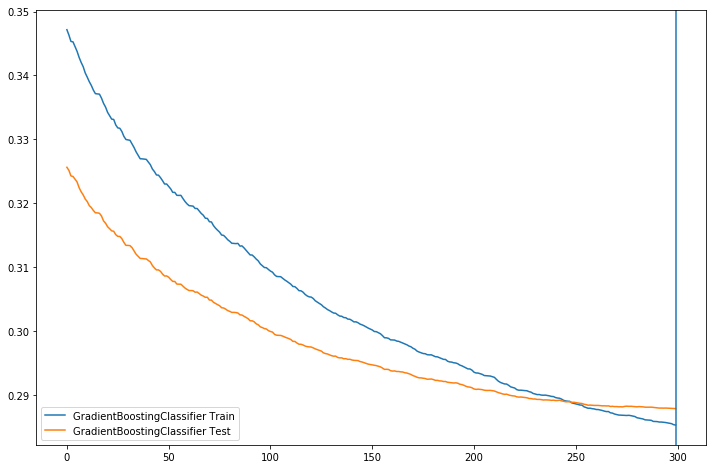

In [104]:
stage_score_plot(gbm1, X_train, y_train, X_test, y_test)

lowest test error(log loss): 0.2871141515907838
num_trees at lowest test error: 279


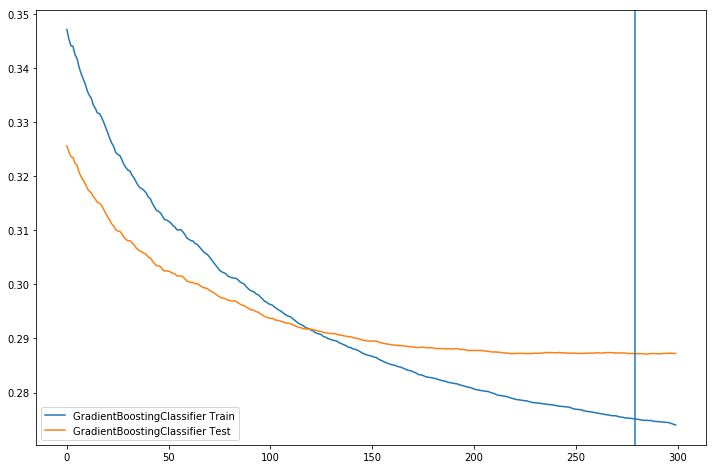

In [105]:
stage_score_plot(gbm2, X_train, y_train, X_test, y_test)

lowest test error(log loss): 0.28753591415508994
num_trees at lowest test error: 160


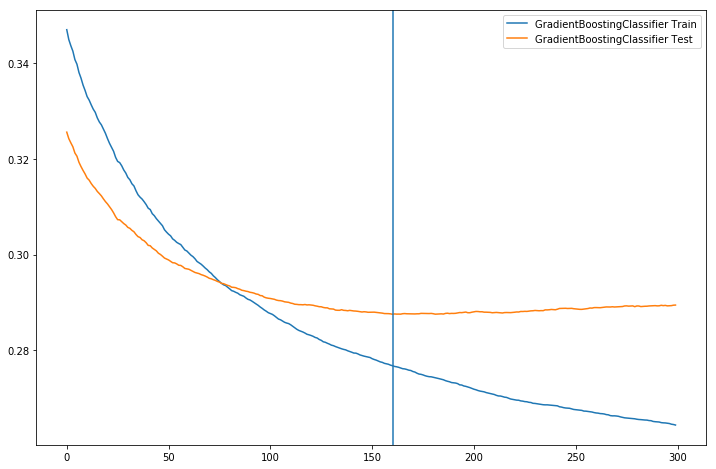

In [106]:
stage_score_plot(gbm3, X_train, y_train, X_test, y_test)

lowest test error(log loss): 0.2892805737364727
num_trees at lowest test error: 171


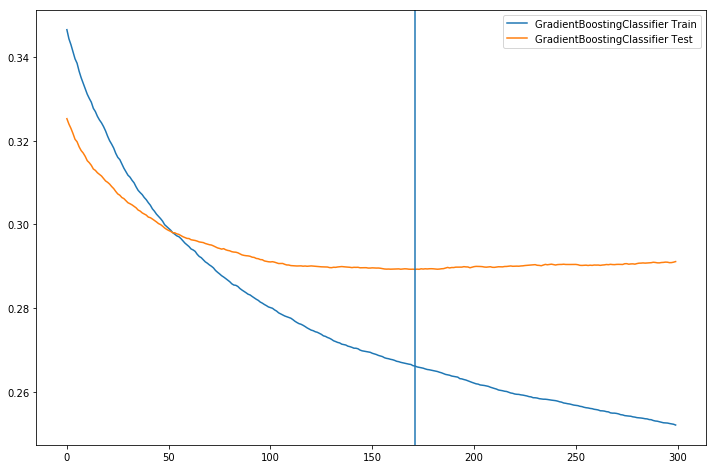

In [107]:
stage_score_plot(gbm4, X_train, y_train, X_test, y_test)

### XGBoost Tuning

In [76]:
from sklearn.model_selection import GridSearchCV

In [108]:
X_train, X_test,indices_train,indices_test = train_test_split(data,indices, test_size=0.33, random_state=8)

y_train, y_test = y[indices_train],  y[indices_test]

In [109]:
xgb1 = XGBClassifier(learning_rate=0.01, n_estimators=200, random_state=8)
xgb2 = XGBClassifier(learning_rate=0.01, n_estimators=300, random_state=8)
xgb3 = XGBClassifier(learning_rate=0.01, n_estimators=400, random_state=8)
xgb4 = XGBClassifier(learning_rate=0.01, n_estimators=500, random_state=8)
xgb5 = XGBClassifier(learning_rate=0.01, n_estimators=600, random_state=8)

xgb1.fit(X_train, y_train)
xgb2.fit(X_train, y_train)
xgb3.fit(X_train, y_train)
xgb4.fit(X_train, y_train)
xgb5.fit(X_train, y_train)


xgb_p1 =  xgb1.predict_proba(X_test)
xgb_p2 =  xgb2.predict_proba(X_test)
xgb_p3 =  xgb3.predict_proba(X_test)
xgb_p4 =  xgb4.predict_proba(X_test)
xgb_p5 =  xgb5.predict_proba(X_test)



xgb1_ll = log_loss(y_test, xgb_p1)
xgb2_ll = log_loss(y_test, xgb_p2)
xgb3_ll = log_loss(y_test, xgb_p3)
xgb4_ll = log_loss(y_test, xgb_p4)
xgb5_ll = log_loss(y_test, xgb_p5)


print("XGB n_estimators: 200 log loss " + str(xgb1_ll))
print("XGB n_estimators: 300 log loss " + str(xgb2_ll))
print("XGB n_estimators: 400 log loss " + str(xgb3_ll))
print("XGB n_estimators: 500 log loss " + str(xgb4_ll))
print("XGB n_estimators: 600 log loss " + str(xgb5_ll))

XGB n_estimators: 200 log loss 0.30553182962838776
XGB n_estimators: 300 log loss 0.2919211085549338
XGB n_estimators: 400 log loss 0.28966823151737187
XGB n_estimators: 500 log loss 0.29027344755180146
XGB n_estimators: 600 log loss 0.2914646425128541


Best n_estimators of XGB: 400

# Re-run and test on holdout set with tuned parameters

In [111]:
#holding 20% of data for last test
columns = ['shot_distance', 'shot_angle', 'assisted_shot', 'is_penalty_attempt']
holdout = shots_df.sample(frac=.2, random_state=8)
holdout_x = holdout[columns]
holdout_y = holdout['is_goal']
indices_holdout = holdout.index.values

train = shots_df.drop(holdout.index).copy()
data = train[columns]
y = train['is_goal']
indices = train.index.values 

In [112]:
X_train, X_test,indices_train,indices_test = train_test_split(data,indices, test_size=0.33, random_state=8)

y_train, y_test = y[indices_train],  y[indices_test]

In [113]:
xgboost_model = XGBClassifier(learning_rate = 0.01, max_depth = 3, n_estimators = 400, random_state=8)
gradient_boost_model = GradientBoostingClassifier(learning_rate=0.01, max_depth=2, max_features='log2', min_samples_leaf=4, n_estimators=280, subsample=0.25, random_state=8)
random_forest_model = RandomForestClassifier(n_estimators=300, max_depth=3, verbose=1, random_state=8)

xgboost_model.fit(X_train, y_train)
gradient_boost_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

p_random_forest = random_forest_model.predict_proba(X_test)
p_gradient_boost =  gradient_boost_model.predict_proba(X_test)
p_xgboost = xgboost_model.predict_proba(X_test)

#need to concat these two arrays somehow...
ensemble_p_0 = (p_random_forest[:,0] + p_gradient_boost[:,0] + p_xgboost[:,0])/3
ensemble_p_1 = (p_random_forest[:,1] + p_gradient_boost[:,1] + p_xgboost[:,1])/3
# ensemble_p = np.concatenate(ensemble_p_0, ensemble_p_1, axis=0)

random_forest_ll = log_loss(y_test, p_random_forest)
gradient_boost_ll = log_loss(y_test, p_gradient_boost)
xgboost_ll = log_loss(y_test, p_xgboost)
ensemble_ll = log_loss(y_test, ensemble_p_1)
                                     

print("Ensemble Log Loss " + str(ensemble_ll))
print("Gradient Boost Log Loss " + str(gradient_boost_ll))
print("Random Forest Log Loss " + str(random_forest_ll))
print("XGBoost Log Loss " + str(xgboost_ll))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Ensemble Log Loss 0.28642860194427205
Gradient Boost Log Loss 0.2871141515907838
Random Forest Log Loss 0.2861181033606787
XGBoost Log Loss 0.28966823151737187


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


### Testing on Holdout Set

In [114]:
p_random_forest = random_forest_model.predict_proba(holdout_x)
p_gradient_boost =  gradient_boost_model.predict_proba(holdout_x)
p_xgboost = xgboost_model.predict_proba(holdout_x)

#need to concat these two arrays somehow...
ensemble_p_0 = (p_random_forest[:,0] + p_gradient_boost[:,0] + p_xgboost[:,0])/3
ensemble_p_1 = (p_random_forest[:,1] + p_gradient_boost[:,1] + p_xgboost[:,1])/3
# ensemble_p = np.concatenate(ensemble_p_0, ensemble_p_1, axis=0)

random_forest_ll = log_loss(holdout_y, p_random_forest)
gradient_boost_ll = log_loss(holdout_y, p_gradient_boost)
xgboost_ll = log_loss(holdout_y, p_xgboost)
ensemble_ll = log_loss(holdout_y, ensemble_p_1)
                                     

print("Ensemble Log Loss " + str(ensemble_ll))
print("Gradient Boost Log Loss " + str(gradient_boost_ll))
print("Random Forest Log Loss " + str(random_forest_ll))
print("XGBoost Log Loss " + str(xgboost_ll))

Ensemble Log Loss 0.3211588479932041
Gradient Boost Log Loss 0.32320781028048234
Random Forest Log Loss 0.3216486684836253
XGBoost Log Loss 0.3219990956839689


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


In [115]:
import pickle

rf_pkl_filename = 'rfc.pkl'
rf_pkl = open(rf_pkl_filename, 'wb')
pickle.dump(random_forest_model, rf_pkl)
rf_pkl.close()

gb_pkl_filename = 'gb.pkl'
gb_pkl = open(gb_pkl_filename, 'wb')
pickle.dump(gradient_boost_model, gb_pkl)
gb_pkl.close()

xgb_pkl_filename = 'xgb.pkl'
xgb_pkl = open(xgb_pkl_filename, 'wb')
pickle.dump(xgboost_model, xgb_pkl)
xgb_pkl.close()

# Predict on Complete Data Set and Add xG

In [116]:
from model_prep import create_rf_prep, create_xG_df, create_summed_xG_df

In [117]:
model_ready_df = create_rf_prep(shots_df)
model_ready_df.head()

,player_id,shot_distance,shot_angle,assisted_shot,is_penalty_attempt
0,99779.0,6.838786,12.755990,1.0,0.0
1,60730.0,21.747333,11.242763,0.0,0.0
2,177285.0,12.000000,0.000000,0.0,1.0
3,185745.0,16.803407,59.849102,1.0,0.0
4,77892.0,26.220122,32.065607,0.0,0.0


In [118]:
rf_model = pickle.load(open("rfc.pkl", "rb"))
gb_model = pickle.load(open("gb.pkl", "rb"))
xgb_model = pickle.load(open("xgb.pkl", "rb"))

In [119]:
columns = ['shot_distance', 'shot_angle', 'assisted_shot', 'is_penalty_attempt']

In [120]:
p_random_forest = rf_model.predict_proba(model_ready_df[columns])
p_gradient_boost =  gb_model.predict_proba(model_ready_df[columns])
p_xgboost = xgb_model.predict_proba(model_ready_df[columns])
p_ensemble = (p_random_forest + p_gradient_boost + p_xgboost) / 3

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished


## Aggregate

In [121]:
rf_xg = create_xG_df(model_ready_df, shots_df['is_goal'], p_random_forest)
rf_contributions = create_summed_xG_df(rf_xg)

gb_xg = create_xG_df(model_ready_df, shots_df['is_goal'], p_gradient_boost)
gb_contributions = create_summed_xG_df(gb_xg)

xgb_xg = create_xG_df(model_ready_df, shots_df['is_goal'], p_xgboost)
xgb_contributions = create_summed_xG_df(xgb_xg)

ensemble_xg = create_xG_df(model_ready_df, shots_df['is_goal'], p_ensemble)
ensemble_contributions = create_summed_xG_df(ensemble_xg)

In [122]:
rf_contributions.head()

,player_id,total_xG,total_xA,total_xG+xA,goals
0,16081.0,6.40,1.57,7.97,8.0
1,488.0,5.79,1.14,6.93,11.0
2,24256.0,5.55,2.48,8.03,12.0
3,20195.0,5.35,1.06,6.41,5.0
4,31939.0,4.39,1.26,5.65,5.0


In [123]:
gb_contributions.head()

,player_id,total_xG,total_xA,total_xG+xA,goals
0,24256.0,6.01,2.71,8.72,12.0
1,16081.0,5.99,1.61,7.60,8.0
2,20195.0,5.71,1.23,6.94,5.0
3,488.0,5.59,1.22,6.81,11.0
4,17217.0,4.51,1.38,5.89,3.0


In [124]:
xgb_contributions.head()

,player_id,total_xG,total_xA,total_xG+xA,goals
0,24256.0,6.59,2.85,9.44,12.0
1,16081.0,6.38,1.56,7.94,8.0
2,20195.0,6.19,1.37,7.56,5.0
3,488.0,6.16,1.09,7.25,11.0
4,31939.0,5.06,1.52,6.58,5.0


In [125]:
ensemble_contributions.head()

,player_id,total_xG,total_xA,total_xG+xA,goals
0,16081.0,6.26,1.58,7.84,8.0
1,24256.0,6.05,2.68,8.73,12.0
2,488.0,5.85,1.15,7.00,11.0
3,20195.0,5.75,1.22,6.97,5.0
4,31939.0,4.64,1.39,6.03,5.0


In [126]:
rf_sl = pd.merge(rf_contributions, final_df, on=['player_id'])
gb_sl = pd.merge(gb_contributions, final_df, on=['player_id'])
xgb_sl = pd.merge(xgb_contributions, final_df, on=['player_id'])
ens_sl = pd.merge(ensemble_contributions, final_df, on=['player_id'])

In [127]:
rf_sl.head()

,player_id,total_xG,total_xA,total_xG+xA,goals,player_name,club,birthday,age,foot,position_id,squad_num,height,total_minutes_played,transfer_value(sterlings),transfer_value(USD)
0,16081.0,6.40,1.57,7.97,8.0,Luis Rodríguez,Squad Club Atlético Tucumán,"Jan 1, 1985 (33)",33,right,Forward,7.0,"1,67 m",917.900000,£1.35m,1.71
1,488.0,5.79,1.14,6.93,11.0,Lisandro López,Squad Racing Club,"Mar 2, 1983 (35)",35,right,Forward,15.0,"1,74 m",1118.533333,£1.58m,2.01
2,24256.0,5.55,2.48,8.03,12.0,Emmanuel Gigliotti,Squad Club Atlético Independiente,"May 20, 1987 (31)",31,right,Forward,9.0,"1,87 m",1247.966667,£2.70m,3.43
3,20195.0,5.35,1.06,6.41,5.0,Sebastián Ribas,Squad Club Atlético Lanús,"Mar 11, 1988 (30)",30,right,Forward,37.0,"1,87 m",1166.283333,£1.35m,1.71
4,31939.0,4.39,1.26,5.65,5.0,Santiago García,Squad Club Deportivo Godoy Cruz Antonio Tomba,"Sep 14, 1990 (28)",28,right,Forward,18.0,"1,81 m",1159.566667,£5.40m,6.86


In [128]:
rf_sl['xG+xA/90'] = round(rf_sl['total_xG+xA'] / (rf_sl['total_minutes_played'] / 90 ), 2)
gb_sl['xG+xA/90'] = round(gb_sl['total_xG+xA'] / (gb_sl['total_minutes_played'] / 90 ), 2)
xgb_sl['xG+xA/90'] = round(xgb_sl['total_xG+xA'] / (xgb_sl['total_minutes_played'] / 90 ), 2)
ens_sl['xG+xA/90'] = round(ens_sl['total_xG+xA'] / (ens_sl['total_minutes_played'] / 90 ), 2)

In [129]:
final_col = ['player_id', 'player_name', 'club', 'birthday', 'age', 'foot', 'position_id', 'squad_num',
       'total_xG', 'total_xA', 'total_xG+xA', 'goals', 'xG+xA/90', 'transfer_value(USD)', 'total_minutes_played']

rf_df = rf_sl[final_col]
gb_df = gb_sl[final_col]
xgb_df = xgb_sl[final_col]
ens_df = ens_sl[final_col]

In [130]:
rf_df.head()

,player_id,player_name,club,birthday,age,foot,position_id,squad_num,total_xG,total_xA,total_xG+xA,goals,xG+xA/90,transfer_value(USD),total_minutes_played
0,16081.0,Luis Rodríguez,Squad Club Atlético Tucumán,"Jan 1, 1985 (33)",33,right,Forward,7.0,6.40,1.57,7.97,8.0,0.78,1.71,917.900000
1,488.0,Lisandro López,Squad Racing Club,"Mar 2, 1983 (35)",35,right,Forward,15.0,5.79,1.14,6.93,11.0,0.56,2.01,1118.533333
2,24256.0,Emmanuel Gigliotti,Squad Club Atlético Independiente,"May 20, 1987 (31)",31,right,Forward,9.0,5.55,2.48,8.03,12.0,0.58,3.43,1247.966667
3,20195.0,Sebastián Ribas,Squad Club Atlético Lanús,"Mar 11, 1988 (30)",30,right,Forward,37.0,5.35,1.06,6.41,5.0,0.49,1.71,1166.283333
4,31939.0,Santiago García,Squad Club Deportivo Godoy Cruz Antonio Tomba,"Sep 14, 1990 (28)",28,right,Forward,18.0,4.39,1.26,5.65,5.0,0.44,6.86,1159.566667


In [131]:
gb_df.head()

,player_id,player_name,club,birthday,age,foot,position_id,squad_num,total_xG,total_xA,total_xG+xA,goals,xG+xA/90,transfer_value(USD),total_minutes_played
0,24256.0,Emmanuel Gigliotti,Squad Club Atlético Independiente,"May 20, 1987 (31)",31,right,Forward,9.0,6.01,2.71,8.72,12.0,0.63,3.43,1247.966667
1,16081.0,Luis Rodríguez,Squad Club Atlético Tucumán,"Jan 1, 1985 (33)",33,right,Forward,7.0,5.99,1.61,7.60,8.0,0.75,1.71,917.900000
2,20195.0,Sebastián Ribas,Squad Club Atlético Lanús,"Mar 11, 1988 (30)",30,right,Forward,37.0,5.71,1.23,6.94,5.0,0.54,1.71,1166.283333
3,488.0,Lisandro López,Squad Racing Club,"Mar 2, 1983 (35)",35,right,Forward,15.0,5.59,1.22,6.81,11.0,0.55,2.01,1118.533333
4,17217.0,Jonatan Cristaldo,Squad Racing Club,"Mar 5, 1989 (29)",29,right,Forward,9.0,4.51,1.38,5.89,3.0,0.56,1.37,944.966667


In [132]:
xgb_df.head()

,player_id,player_name,club,birthday,age,foot,position_id,squad_num,total_xG,total_xA,total_xG+xA,goals,xG+xA/90,transfer_value(USD),total_minutes_played
0,24256.0,Emmanuel Gigliotti,Squad Club Atlético Independiente,"May 20, 1987 (31)",31,right,Forward,9.0,6.59,2.85,9.44,12.0,0.68,3.43,1247.966667
1,16081.0,Luis Rodríguez,Squad Club Atlético Tucumán,"Jan 1, 1985 (33)",33,right,Forward,7.0,6.38,1.56,7.94,8.0,0.78,1.71,917.900000
2,20195.0,Sebastián Ribas,Squad Club Atlético Lanús,"Mar 11, 1988 (30)",30,right,Forward,37.0,6.19,1.37,7.56,5.0,0.58,1.71,1166.283333
3,488.0,Lisandro López,Squad Racing Club,"Mar 2, 1983 (35)",35,right,Forward,15.0,6.16,1.09,7.25,11.0,0.58,2.01,1118.533333
4,31939.0,Santiago García,Squad Club Deportivo Godoy Cruz Antonio Tomba,"Sep 14, 1990 (28)",28,right,Forward,18.0,5.06,1.52,6.58,5.0,0.51,6.86,1159.566667


In [133]:
ens_df.head()

,player_id,player_name,club,birthday,age,foot,position_id,squad_num,total_xG,total_xA,total_xG+xA,goals,xG+xA/90,transfer_value(USD),total_minutes_played
0,16081.0,Luis Rodríguez,Squad Club Atlético Tucumán,"Jan 1, 1985 (33)",33,right,Forward,7.0,6.26,1.58,7.84,8.0,0.77,1.71,917.900000
1,24256.0,Emmanuel Gigliotti,Squad Club Atlético Independiente,"May 20, 1987 (31)",31,right,Forward,9.0,6.05,2.68,8.73,12.0,0.63,3.43,1247.966667
2,488.0,Lisandro López,Squad Racing Club,"Mar 2, 1983 (35)",35,right,Forward,15.0,5.85,1.15,7.00,11.0,0.56,2.01,1118.533333
3,20195.0,Sebastián Ribas,Squad Club Atlético Lanús,"Mar 11, 1988 (30)",30,right,Forward,37.0,5.75,1.22,6.97,5.0,0.54,1.71,1166.283333
4,31939.0,Santiago García,Squad Club Deportivo Godoy Cruz Antonio Tomba,"Sep 14, 1990 (28)",28,right,Forward,18.0,4.64,1.39,6.03,5.0,0.47,6.86,1159.566667
